# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file provided with the assignment contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [1]:
# import libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Your answer to Graded Task 1 here:
walmart_data = pd.read_csv('1962_2006_walmart_store_openings.csv')

print("The columns of dataframe are:'\n'{col}".format(col=walmart_data.columns))
print("-------------------------------------------------------------------------------------")
print("The shape of dataframe is:'\n'{sh}".format(sh=walmart_data.shape))
print("-------------------------------------------------------------------------------------")
print(walmart_data.info())
print("-------------------------------------------------------------------------------------")
print("Brief view of dataframe:'\n'{vie}".format(vie=walmart_data.head(10)))

The columns of dataframe are:'
'Index(['storenum', 'OPENDATE', 'date_super', 'conversion', 'st', 'county',
       'STREETADDR', 'STRCITY', 'STRSTATE', 'ZIPCODE', 'type_store', 'LAT',
       'LON', 'MONTH', 'DAY', 'YEAR'],
      dtype='object')
-------------------------------------------------------------------------------------
The shape of dataframe is:'
'(2992, 16)
-------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   storenum    2992 non-null   int64  
 1   OPENDATE    2992 non-null   object 
 2   date_super  1946 non-null   object 
 3   conversion  1946 non-null   float64
 4   st          2992 non-null   int64  
 5   county      2992 non-null   int64  
 6   STREETADDR  2992 non-null   object 
 7   STRCITY     2992 non-null   object 
 8   STRSTATE    2992 non-n

#### [GRADED  TASK 2]

- which state has the `most` number of Walmart super stores?
- which city has the `most` Walmart store (super stores and regular stores combined)?

In [3]:
# Your answer to Graded Task 2 here:
# PART A
state_df = walmart_data[walmart_data['type_store']=='Supercenter']
print("State that has most number of Walmart Super Store is:")
state_df.groupby('STRSTATE').STRSTATE.agg("count").to_frame('Super Store Count').sort_values('Super Store Count',ascending=False).iloc[0]

State that has most number of Walmart Super Store is:


Super Store Count    253
Name: TX, dtype: int64

In [4]:
# PART B
print("City that has most number of Walmart Store (super store + regular store) is:")
walmart_data.groupby('STRCITY').STRCITY.agg("count").to_frame('Walmart Store Count').sort_values('Walmart Store Count',ascending=False).iloc[0]

City that has most number of Walmart Store (super store + regular store) is:


Walmart Store Count    14
Name: Houston, dtype: int64

#### [GRADED  TASK 3]
Write a function that takes as a inputs:

1. `OPENDATE` column (as a pandas Data Series)
2. `STRSTATE` columns (as a pandas Data Series)
3. a state abbreviaton (e.g. `AR`)

and, then, the function calcualtes the `cumulative` number of stores over time opened in that state

In [5]:
# Your answer to Graded Task 3 here:
def cumulativeStoreCount(stateSeries, dateSeries,s):
    df= pd.concat([stateSeries,dateSeries], axis=1)
    df['OPENDATE'] = pd.to_datetime(df['OPENDATE'], format='%m/%d/%y')
    stateDF=df[df['STRSTATE']==s]
    stateDF['StoreCount']=1
    stateDF=stateDF.groupby(by=['STRSTATE','OPENDATE'],sort=True).sum().groupby(level=[0]).cumsum(skipna=True).reset_index()
    return stateDF

print("Cumulative store opened in the {state} over time:'\n'{cum}".format(cum=cumulativeStoreCount(walmart_data['STRSTATE'],
                                                                                                   walmart_data['OPENDATE'],
                                                                                                   'WY'),
                                                                                                   state='WY'))

Cumulative store opened in the WY over time:'
'  STRSTATE   OPENDATE  StoreCount
0       WY 1989-12-30           1
1       WY 1990-04-02           2
2       WY 1990-06-27           3
3       WY 1990-08-01           5
4       WY 1990-10-29           6
5       WY 1991-01-30           7
6       WY 1991-12-31           8
7       WY 1992-04-01           9


C:\Data_Science_Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Texas (TX).

C:\Data_Science_Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'TIme series of cumulative store count of Texas over time')

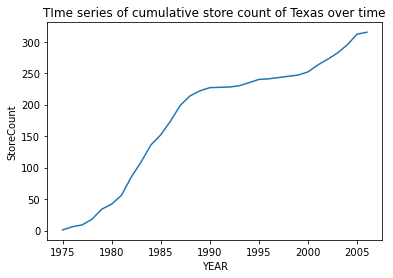

In [7]:
# Your answer to Graded Task 4 here:
df= pd.concat([walmart_data['STRSTATE'],walmart_data['YEAR']], axis=1)
stateDF=df[df['STRSTATE']=='TX']
stateDF['StoreCount']=1
stateDF=stateDF.groupby(by=['STRSTATE','YEAR'],sort=True).sum().groupby(level=[0]).cumsum(skipna=True).reset_index()
sns.lineplot(x='YEAR',y='StoreCount', data=stateDF)
plt.title("TIme series of cumulative store count of Texas over time")

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a grouped bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Nevada (NV).

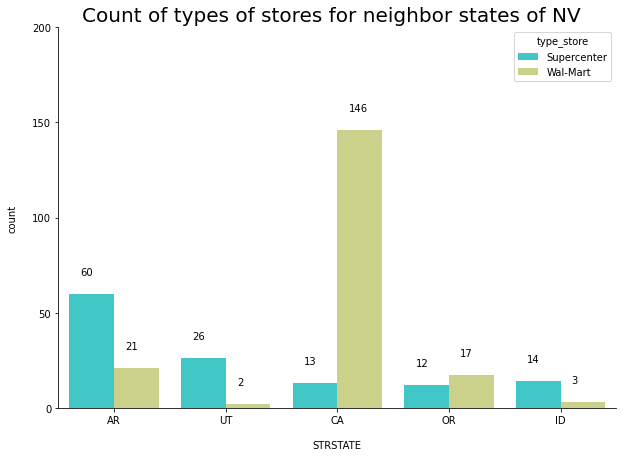

In [8]:
# Your asnwer to Graded Task 5 here:
list_of_values = ['OR','CA','AR','UT','ID']
nvDF = walmart_data[walmart_data['STRSTATE'].isin(list_of_values)]
plt.figure(figsize=(10,7))
plt.title("Count of types of stores for neighbor states of NV  ",fontsize=20, ha='center') 
plt.xlabel("States", labelpad=15)
plt.ylabel("Count", labelpad= 15)
plt.grid( b = False, axis ='both')
ax = sns.countplot(x = 'STRSTATE',data=nvDF ,hue = 'type_store', palette='rainbow')
ax.set_yticks(np.arange(0, 250, 50))
sns.despine()
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))